# Case Study Objectives:

Source data: The NYC Taxi and Limousine Commission (TLC) publicly shares data on trips taken by Yellow taxis, Green taxis, and “For-Hire-Vehicles” (FHVs), the analysis will focus on trips taken by Yellow taxis in June 2017.

1)Imagine that you decide to drive a taxi for 10 hours each week to earn a little extra money. Explain how you would approach maximizing your income as a taxi driver.

2)If you could enrich the dataset, what would you add?  Is there anything in the dataset that you don’t find especially useful?

You may find the Yellow taxi data dictionary(https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)and taxi zone lookup table(https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv)

## 1. Read data and Merge Data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from scipy import stats

In [2]:
trip_data = pd.read_csv('/Users/Palinzhou/data/Analytics/.../yellow_tripdata_201706.csv')

In [3]:
print(trip_data.shape)


(9656993, 17)


In [4]:
print(list(trip_data.columns))

['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']


In [5]:
trip_data.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2017-06-08 07:52:31,2017-06-08 08:01:32,6,1.03,1,N,161,140,1,7.5,1.0,0.5,1.86,0.0,0.3,11.16
1,2,2017-06-08 08:08:18,2017-06-08 08:14:00,6,1.03,1,N,162,233,1,6.0,1.0,0.5,2.34,0.0,0.3,10.14
2,2,2017-06-08 08:16:49,2017-06-08 15:43:22,6,5.63,1,N,137,41,2,21.5,1.0,0.5,0.00,0.0,0.3,23.30


In [6]:
trip_data['PULocationID'].unique()

array([161, 162, 137, 142, 140, 132, 138, 148, 114, 234, 263, 229,  48,
       249,  45, 261, 100, 262,  50, 170,  79, 239, 113, 230, 232, 107,
        90, 144, 151, 164, 244, 264,  75, 158, 163, 238, 186,  12, 193,
        68, 141,  87, 236, 231,  82, 211, 237, 226, 246, 255, 233,  74,
        24,  43,  42,   4, 209,  13, 143, 166, 116, 152, 202,  41,  88,
       145, 125,  40,  25,  65,   7, 265, 224,  34, 260, 215,  33, 106,
        66,  52, 256, 223,  97, 181,  98,  10, 243, 129, 179, 146, 216,
       112,  70, 168,  62,  93, 195, 189, 247,  95, 225,  17, 194,  49,
        54, 198,  89, 134, 252,  36, 119,  83,  28,  80,  92, 124, 257,
       219, 254, 235, 197, 127, 169, 217,  37, 159, 228,  94,   1, 155,
       173,  61, 258,  51, 150, 135, 220,  77, 102,  69,   8, 250, 167,
       242,  35,  47, 188, 177,  32,  14, 133, 171, 190, 208, 157, 192,
       207, 241,  78, 227, 259, 160,  63,  67,  73,  76,  26, 147,  85,
       206, 183, 196,  56,  72, 210,  20,  64,  23, 136,  39,   

In [7]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656993 entries, 0 to 9656992
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.2+ GB


In [8]:
zone_lkp = pd.read_csv('/Users/Palinzhou/data/Analytics/.../taxi_zone_lookup.csv')

In [9]:
zone_lkp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
LocationID      265 non-null int64
Borough         265 non-null object
Zone            264 non-null object
service_zone    263 non-null object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [10]:
#Add prefix to variables for mapping
pu_zone_lkp = zone_lkp.add_prefix('PU')
do_zone_lkp = zone_lkp.add_prefix('DO')

In [11]:
#Mapping Pick up and drop off locationID 
data = trip_data.merge(pu_zone_lkp, how='left', on='PULocationID', validate='m:1')
data = data.merge(do_zone_lkp, how='left', on='DOLocationID', validate='m:1')

In [12]:
#derive features
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['pu_weekday'] = data['tpep_pickup_datetime'].dt.dayofweek
data['pu_month'] = data['tpep_pickup_datetime'].dt.month
data['pu_day'] = data['tpep_pickup_datetime'].dt.day
data['pu_hr'] = data['tpep_pickup_datetime'].dt.hour
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])
data['do_weekday'] = data['tpep_dropoff_datetime'].dt.dayofweek
data['do_month'] = data['tpep_dropoff_datetime'].dt.month
data['do_day'] = data['tpep_dropoff_datetime'].dt.day
data['do_hr'] = data['tpep_dropoff_datetime'].dt.hour
data['trip_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']) / pd.Timedelta('1 min')

In [13]:
# Driver income amount
data['driver_income_amt']= data['total_amount']-data['mta_tax']-data['tolls_amount']

In [14]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pu_weekday,pu_month,pu_day,pu_hr,do_weekday,do_month,do_day,do_hr,trip_duration,driver_income_amt
0,2,2017-06-08 07:52:31,2017-06-08 08:01:32,6,1.03,1,N,161,140,1,...,3,6,8,7,3,6,8,8,9.016667,10.66
1,2,2017-06-08 08:08:18,2017-06-08 08:14:00,6,1.03,1,N,162,233,1,...,3,6,8,8,3,6,8,8,5.700000,9.64
2,2,2017-06-08 08:16:49,2017-06-08 15:43:22,6,5.63,1,N,137,41,2,...,3,6,8,8,3,6,8,15,446.550000,22.80
3,2,2017-06-29 15:52:35,2017-06-29 16:03:27,6,1.43,1,N,142,48,1,...,3,6,29,15,3,6,29,16,10.866667,10.68
4,1,2017-06-01 00:00:00,2017-06-01 00:03:43,1,0.60,1,N,140,141,1,...,3,6,1,0,3,6,1,0,3.716667,7.30


In [15]:
data[['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type']] = data[['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type']].astype(str)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9656993 entries, 0 to 9656992
Data columns (total 33 columns):
VendorID                 object
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count          int64
trip_distance            float64
RatecodeID               object
store_and_fwd_flag       object
PULocationID             object
DOLocationID             object
payment_type             object
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
PUBorough                object
PUZone                   object
PUservice_zone           object
DOBorough                object
DOZone                   object
DOservice_zone           object
pu_weekday               int64
pu_month                 int64
pu_day                   int64
pu_hr                    int64
do_w

## 2. Data Preprocessing

## 2.1 Missing Value Checking/handling if need

In [17]:
#missing values check
missing_data = pd.DataFrame({'total_missing':data.isnull().sum(),'perc_missing':(data.isnull().sum()/len(data)*100)})
missing_data

,total_missing,perc_missing
VendorID,0,0.000000
tpep_pickup_datetime,0,0.000000
tpep_dropoff_datetime,0,0.000000
passenger_count,0,0.000000
trip_distance,0,0.000000
RatecodeID,0,0.000000
store_and_fwd_flag,0,0.000000
PULocationID,0,0.000000
DOLocationID,0,0.000000
payment_type,0,0.000000


In [18]:
data['RatecodeID'].unique()

array(['1', '2', '5', '4', '3', '6', '99'], dtype=object)

In [19]:
data['PUBorough'].unique()

array(['Manhattan', 'Queens', 'Unknown', 'Brooklyn', 'Bronx', 'EWR',
       'Staten Island'], dtype=object)

In [20]:
# remove the unknown ratecodeID
data_clean = data[(data['RatecodeID'] != '99') & (data['PUBorough'] != 'Unknown') & (data['DOBorough'] != 'Unknown')]

In [21]:
# Drop payment_type equals to "No Charge"(3), "Dispute"(4), and "Voided trip"(6) because we should focus on "valid trips" which is closely related to incomes
data_clean = data_clean[~data_clean['payment_type'].isin(['3', '4', '6'])]

In [22]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9420629 entries, 0 to 9656992
Data columns (total 33 columns):
VendorID                 object
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count          int64
trip_distance            float64
RatecodeID               object
store_and_fwd_flag       object
PULocationID             object
DOLocationID             object
payment_type             object
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
PUBorough                object
PUZone                   object
PUservice_zone           object
DOBorough                object
DOZone                   object
DOservice_zone           object
pu_weekday               int64
pu_month                 int64
pu_day                   int64
pu_hr                    int64
do_w

In [23]:
# learn more about factors using summary statistics
round(data_clean[['driver_income_amt','trip_distance', 'trip_duration']].describe(), 2)

,driver_income_amt,trip_distance,trip_duration
count,9420629.00,9420629.00,9420629.00
mean,15.64,2.95,16.87
std,217.83,5.67,55.41
min,-52.30,0.00,0.00
25%,8.26,1.00,6.73
50%,11.34,1.68,11.30
75%,17.38,3.10,18.63
max,630462.62,9496.98,14407.65


To surprise us, we can see some negative amount for drivers' income amount for trips. It's unreasonable to think that a taxi driver will take a ride resulting negative amounts. Here we assume the negative values are caused from data quality issues or some other reasons,so we would consider to drop these records.

In [24]:
data_clean = data_clean[data_clean['driver_income_amt'] > 0]

We also can see there are some records with extreme duration/amounts, that deviate from other records and not happened as often for such long durations/distances to contribute much income to drivers. we will consider to use standard and powerful method Z-score and appropriate threshold to detect and remove these outliers.

## 2.2 Outlier Detecting and Removal

In [25]:
# Use the standard and powerful method Z-score and threshold set as 3 to detect and get rid of outliers in data
data_clean['driver_income_Z'] = stats.zscore(data_clean['driver_income_amt'])
data_clean['distance_Z'] = stats.zscore(data_clean['trip_distance'])
data_clean['duration_Z'] = stats.zscore(data_clean['trip_duration'])
data_clean = data_clean[(data_clean['driver_income_Z'].between(-3, 3)) &(data_clean['distance_Z'].between(-3, 3))&(data_clean['duration_Z'].between(-3, 3))]

In [26]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9349995 entries, 0 to 9656992
Data columns (total 36 columns):
VendorID                 object
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count          int64
trip_distance            float64
RatecodeID               object
store_and_fwd_flag       object
PULocationID             object
DOLocationID             object
payment_type             object
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
PUBorough                object
PUZone                   object
PUservice_zone           object
DOBorough                object
DOZone                   object
DOservice_zone           object
pu_weekday               int64
pu_month                 int64
pu_day                   int64
pu_hr                    int64
do_w

In [27]:
round(data_clean[['driver_income_amt','trip_distance', 'trip_duration']].describe(), 2)

,driver_income_amt,trip_distance,trip_duration
count,9349995.00,9349995.00,9349995.00
mean,15.24,2.84,14.52
std,11.95,3.35,11.87
min,0.05,0.00,0.00
25%,8.25,1.00,6.70
50%,11.30,1.66,11.22
75%,17.30,3.04,18.40
max,645.30,19.95,183.05


In [28]:
print("Ultimately we get {}% of raw data for further analysis".format(round(len(data_clean)*100/len(data)), 2))

Ultimately we get 97% of raw data for further analysis


Since we have derived some features, we will drop some duplicate features.

In [29]:
drop_data = data_clean.drop('tpep_pickup_datetime', axis=1)
drop_data = drop_data.drop('tpep_dropoff_datetime', axis=1)
drop_data = drop_data.drop('PULocationID', axis=1)
drop_data = drop_data.drop('DOLocationID', axis=1)

## 3. Explotary Data Analysis

## 3.1 The number of pickups, mean of drivers' income and mean of trip duration from boroughs

In [30]:
def get_stats(group):
    return {'min':group.min(),'max':group.max(),'count':group.count(),'mean':group.mean()}


In [31]:
PUBorough_driver = drop_data['driver_income_amt'].groupby(drop_data['PUBorough']).apply(get_stats).unstack().add_prefix('Driver_income_')
PUBOrough_duration = drop_data['trip_duration'].groupby(drop_data['PUBorough']).apply(get_stats).unstack().add_prefix('trip_duration_')
PU_COM = pd.concat([PUBorough_driver, PUBOrough_duration], axis=1, sort=False)
PU_COM

,Driver_income_count,Driver_income_max,Driver_income_mean,Driver_income_min,trip_duration_count,trip_duration_max,trip_duration_mean,trip_duration_min
PUBorough,,,,,,,,
Bronx,7680.0,343.65,16.169655,0.30,7680.0,144.750000,13.277786,0.00
Brooklyn,147608.0,490.30,16.419471,0.30,147608.0,181.000000,14.540876,0.00
EWR,634.0,305.15,91.549685,0.30,634.0,149.933333,2.078286,0.00
Manhattan,8648428.0,645.30,13.705553,0.30,8648428.0,183.050000,13.253446,0.00
Queens,545533.0,550.30,39.200786,0.05,545533.0,182.716667,34.549422,0.00
Staten Island,112.0,168.46,40.972768,0.31,112.0,111.616667,8.481101,0.05


Insight: we can see Manhanttan has the largest volume of pickups but the trip duration is not long. That gives us some intuition - a large volume of short ride demand from Manhattan borough b/c traffic situation, transportation circumstances, and some specific reasons. And Queens has the second largest volume of pickups with the longest average trip duration, and higher drivers'average income as well.Comparatively speaking, EWR has the highest average income with less pickup records. We will try to find out why EWR has the highest average income through below further analysis to figure out which boroughs are our focus when considering the maximum of drivers' income.



## 3.2  If high number of passengers demand happens in specific boroughs/zones

In [32]:
# passenger count for ride by borough
PUBorough_passenger_cnt = drop_data['passenger_count'].groupby(drop_data['PUBorough']).apply(get_stats).unstack().add_prefix('passenger_count_')
PUBorough_passenger_cnt

,passenger_count_count,passenger_count_max,passenger_count_mean,passenger_count_min
PUBorough,,,,
Bronx,7680.0,6.0,1.623047,0.0
Brooklyn,147608.0,6.0,1.606437,0.0
EWR,634.0,9.0,1.443218,0.0
Manhattan,8648428.0,9.0,1.626951,0.0
Queens,545533.0,7.0,1.658241,0.0
Staten Island,112.0,6.0,1.428571,0.0


In [33]:
PUBorough_zone_passenger_mean = drop_data.groupby(['PUBorough','PUZone'])['passenger_count'].mean().reset_index().rename(columns={'passenger_count': 'pass_count_mean'})
PUBorough_zone_passenger_mean[PUBorough_zone_passenger_mean['pass_count_mean'] >= 2]

,PUBorough,PUZone,pass_count_mean
9,Bronx,Crotona Park,2.666667
14,Bronx,Fordham South,2.633333
16,Bronx,Hunts Point,2.036810
24,Bronx,Parkchester,2.107843
29,Bronx,Schuylerville/Edgewater Park,2.392857
30,Bronx,Soundview/Bruckner,2.439024
31,Bronx,Soundview/Castle Hill,2.039683
43,Brooklyn,Bay Ridge,2.415330
78,Brooklyn,Green-Wood Cemetery,2.086957
122,Manhattan,Governor's Island/Ellis Island/Liberty Island,2.538462


## 3.3 Rate used by borough

In [34]:
# Rate by Borough
PUBorough_rate_pct = drop_data.groupby(['PUBorough','RatecodeID'])['driver_income_amt'].size().groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index().rename(columns={'driver_income_amt': 'percentage'})
PUBorough_rate_pct

,PUBorough,RatecodeID,percentage
0,Bronx,1,95.533854
1,Bronx,2,0.846354
2,Bronx,3,0.156250
3,Bronx,4,0.013021
4,Bronx,5,3.450521
5,Brooklyn,1,98.878110
6,Brooklyn,2,0.352962
7,Brooklyn,3,0.086716
8,Brooklyn,4,0.035906
9,Brooklyn,5,0.645629


## 3.4 The number of pickups from boroughs by weekday

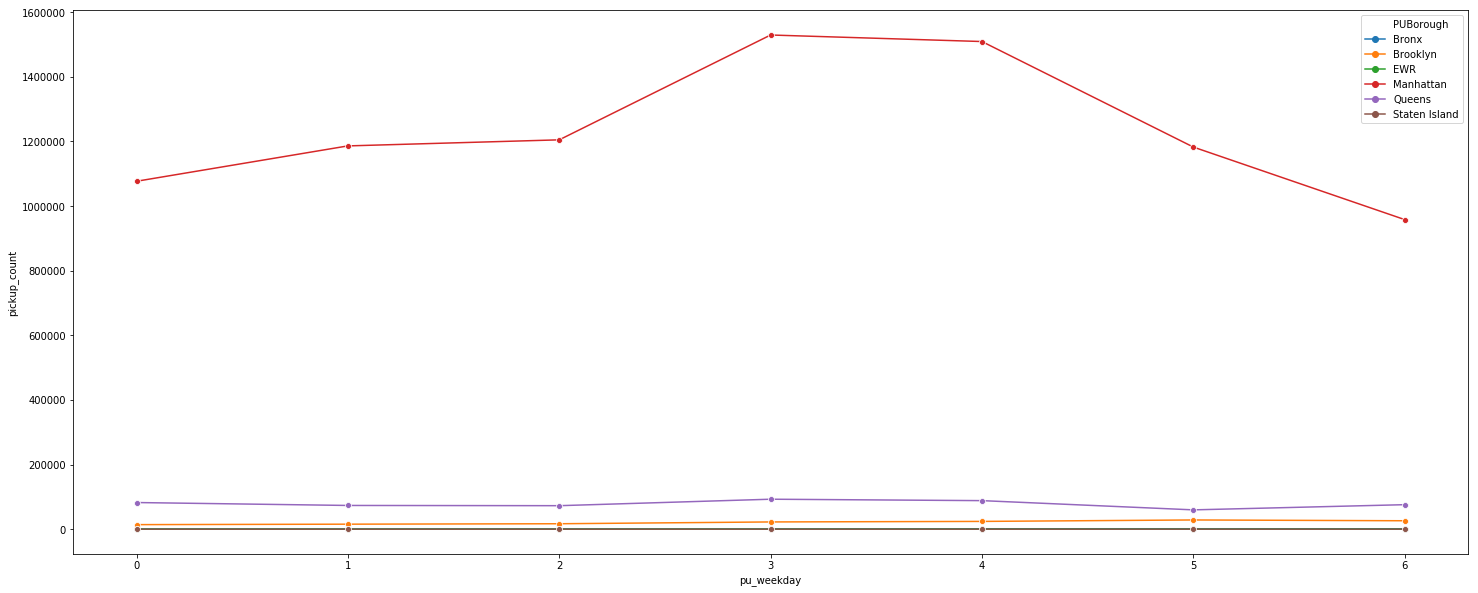

In [35]:
plot_df = drop_data.groupby(['pu_weekday', 'PUBorough'])['driver_income_amt'].count().reset_index().rename(columns={'driver_income_amt': 'pickup_count'})

fig, ax = plt.subplots(figsize=(25, 10))
ax = sns.lineplot(x='pu_weekday', y='pickup_count', hue='PUBorough', style="PUBorough", data=plot_df, markers=['o'] * len(plot_df['PUBorough'].unique()), dashes=False)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()

The graph showed us that obviously the number of pickups from boroughs gradually increases from Monday to Wednesday and has a steep increase to a peak on Thursday and then keep the high volume of pickups through Saturday, ultimately has a trough on Sunday for most boroughs including Manhattan, but the trough in Queens happened on Saturday.

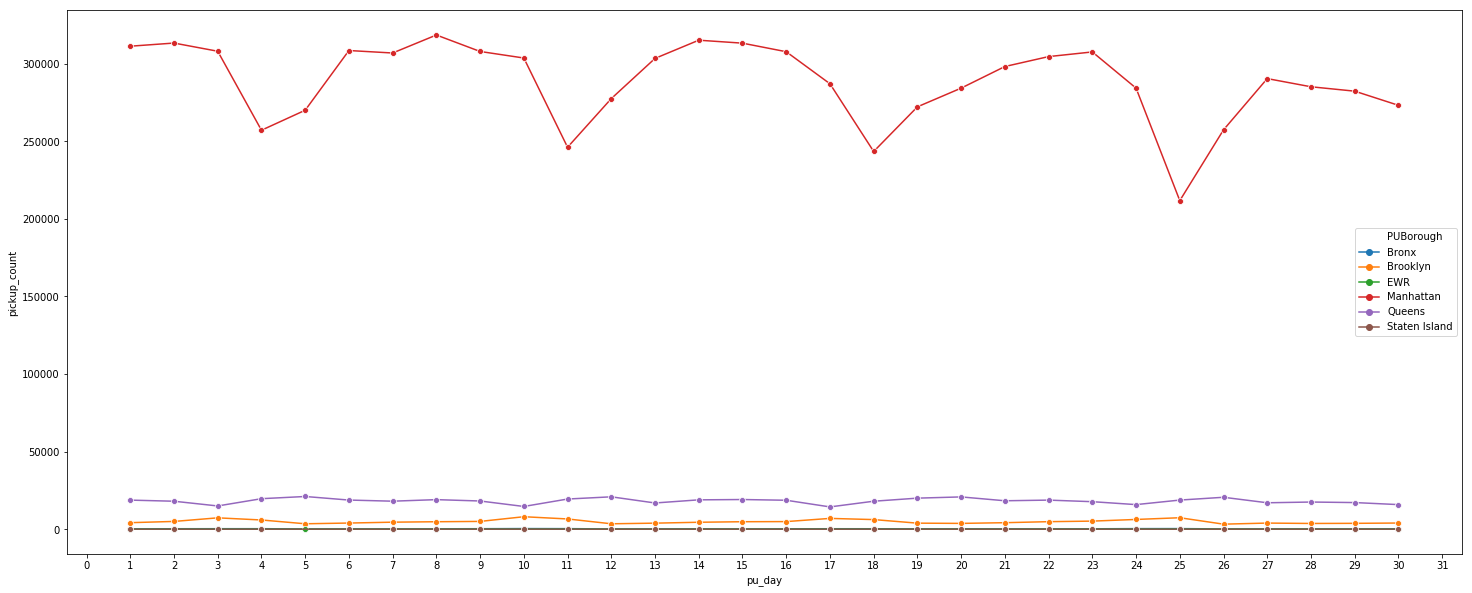

In [36]:
plot_df = drop_data.groupby(['pu_day', 'PUBorough'])['driver_income_amt'].count().reset_index().rename(columns={'driver_income_amt': 'pickup_count'})

fig, ax = plt.subplots(figsize=(25, 10))
ax = sns.lineplot(x='pu_day', y='pickup_count', hue='PUBorough', style="PUBorough", data=plot_df, markers=['o'] * len(plot_df['PUBorough'].unique()), dashes=False)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()

After we can find out which weekdays have high volume riding demand, we will keep our eyes on the hour impact, that will help us to 
work out the 10 hours drive plan in a week to maximize the income. 

## 3.5 The number of pickups from boroughs by hour

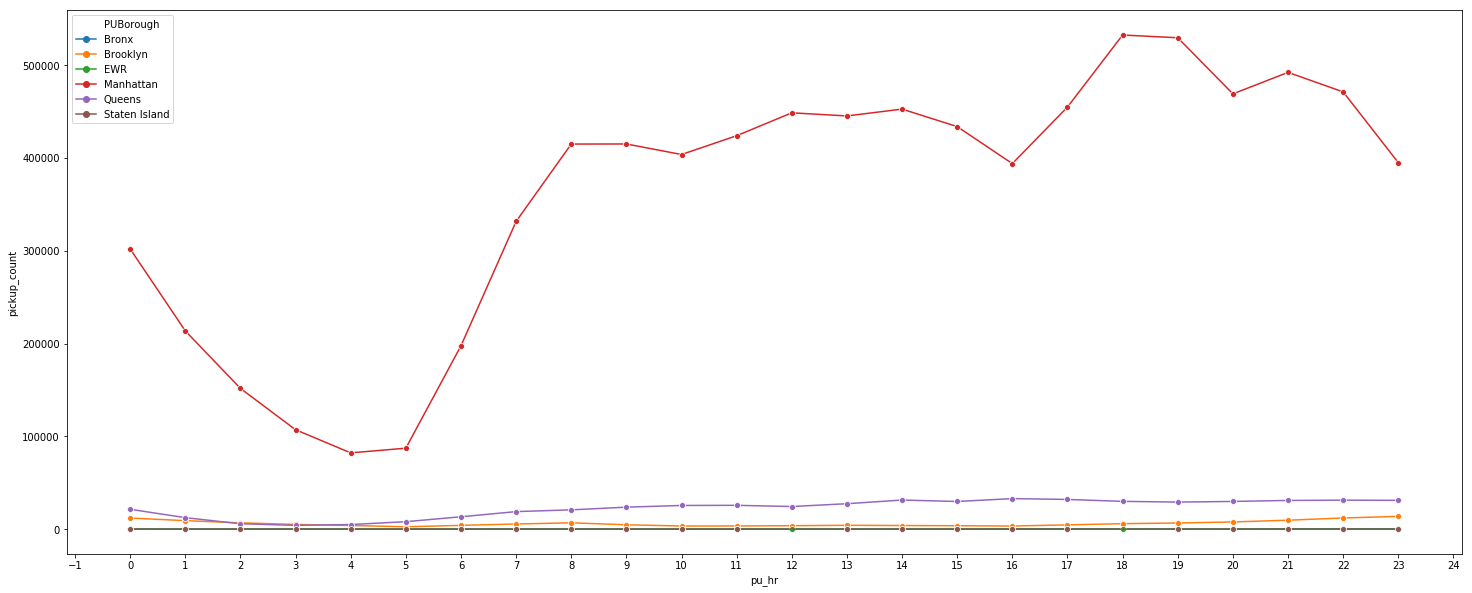

In [37]:
plot_df = drop_data.groupby(['pu_hr', 'PUBorough'])['driver_income_amt'].count().reset_index().rename(columns={'driver_income_amt': 'pickup_count'})

fig, ax = plt.subplots(figsize=(25, 10))
ax = sns.lineplot(x='pu_hr', y='pickup_count', hue='PUBorough', style="PUBorough", data=plot_df, markers=['o'] * len(plot_df['PUBorough'].unique()), dashes=False)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()

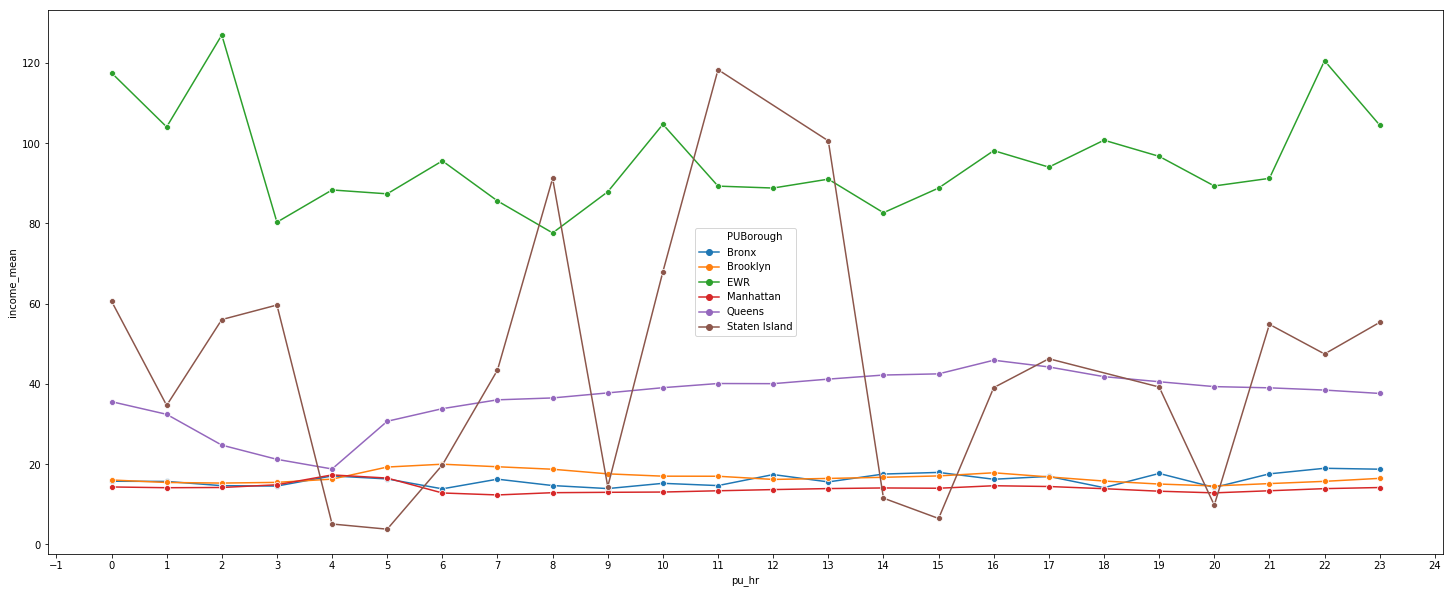

In [38]:
plot_df = drop_data.groupby(['pu_hr', 'PUBorough'])['driver_income_amt'].mean().reset_index().rename(columns={'driver_income_amt': 'income_mean'})

fig, ax = plt.subplots(figsize=(25, 10))
ax = sns.lineplot(x='pu_hr', y='income_mean', hue='PUBorough', style="PUBorough", data=plot_df, markers=['o'] * len(plot_df['PUBorough'].unique()), dashes=False)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()

Considering the perspectives in the volume of pickups demand and average drivers'income from boroughs, we can see the Mahattan, Queens and EWR are our best options to make our 10 days/ week plan to maximize income. We observed that the best times for surges in Mahattan are 7~9AM (morning rush hour with a peak at 8am), 11am~13pm(lunchtime rush hour with a peak at 12pm),5~7PM(dinner time rush hour with a peak at 6pm) and 8~10pm(night time with a peak at 9pm). In Queens particulally there are two peaks at 2pm and 4pm respectively, with highest average income at 4pm. For the ROI from EWR, 10am(morning time), 10pm(night time) and 2am(midnight time) as well are the best options for a driver to pick up passengers.  

## 3.6 Hourly income rate by borough

In [39]:
#calculate the hourly income rate
sub_data = drop_data[['pu_day', 'pu_weekday', 'pu_hr', 'PUBorough','driver_income_amt', 'trip_duration']]
sub_data['weekday_hour'] = round(sub_data['pu_weekday'] + (sub_data['pu_hr']/24), 2)
agg_data = sub_data.groupby(['pu_day', 'weekday_hour' , 'PUBorough']).agg({'driver_income_amt': 'sum','trip_duration': ['sum', 'mean'],'pu_day': 'count'})
agg_data.reset_index(inplace=True)
agg_data.columns = agg_data.columns.get_level_values(1).values + ' ' + agg_data.columns.get_level_values(0).values
agg_data.columns = [s.strip() for s in agg_data.columns.values]
agg_data['hr_rate'] = 60*(agg_data['sum driver_income_amt'] / agg_data['sum trip_duration'])
agg_data = agg_data.replace([np.inf, -np.inf], np.nan).dropna()

/Users/Palinzhou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


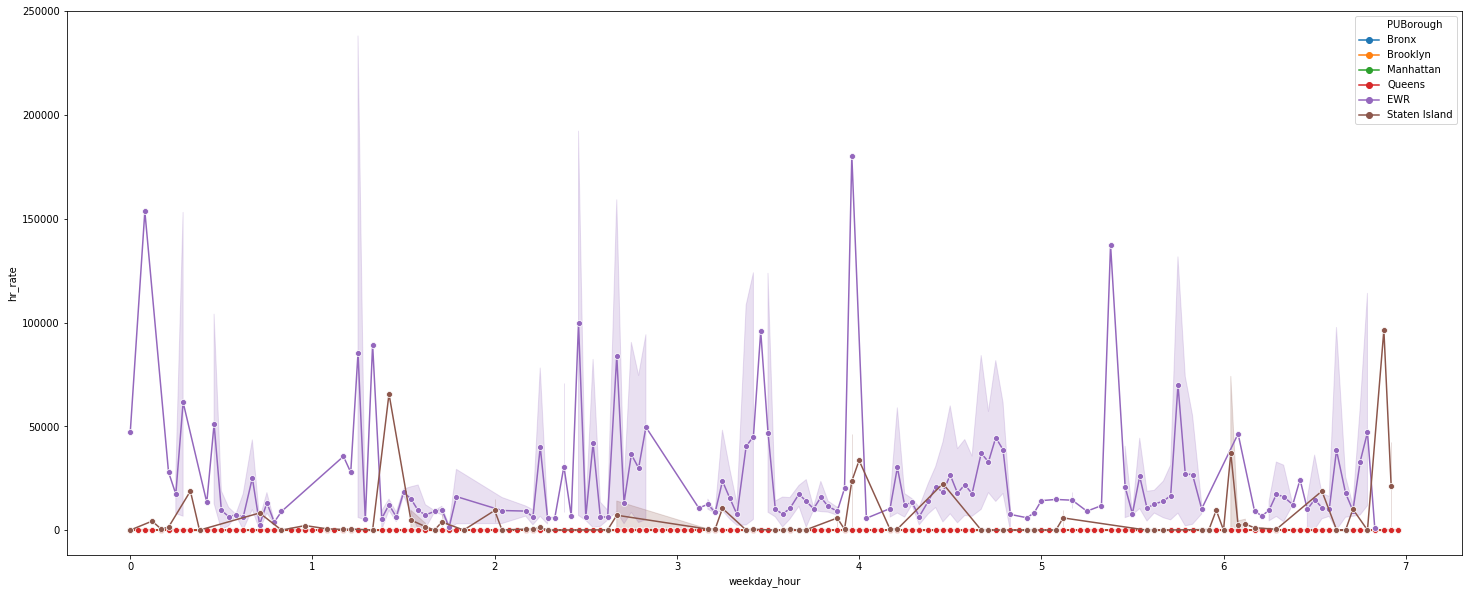

In [40]:
fig, ax = plt.subplots(figsize=(25, 10))
ax = sns.lineplot(x='weekday_hour', y='hr_rate', hue='PUBorough', style="PUBorough", data=agg_data, markers=['o'] * len(agg_data['PUBorough'].unique()), dashes=False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

In [41]:
agg_data = agg_data.drop(['sum driver_income_amt','sum trip_duration'], axis=1)
agg_data.columns =['pu_day', 'weekday_hour','PUBorough','Mean of trip_duration','Pickup Count','Hourly Rate']
agg_data.head()


,pu_day,weekday_hour,PUBorough,Mean of trip_duration,Pickup Count,Hourly Rate
0,1,3.00,Bronx,9.573333,5,70.194986
1,1,3.00,Brooklyn,12.932653,245,74.249834
2,1,3.00,Manhattan,11.621884,7373,73.126328
3,1,3.00,Queens,20.698218,533,104.333425
4,1,3.04,Bronx,12.963333,10,75.674981


In [42]:
agg_data.groupby('PUBorough')[['Pickup Count','Hourly Rate', 'Mean of trip_duration']].describe().transpose()


PUBorough                         Bronx    Brooklyn            EWR  \
Pickup Count          count  718.000000  720.000000     334.000000   
                      mean    10.696379  205.011111       1.895210   
                      std      5.548545  144.059792       1.130166   
                      min      1.000000   44.000000       1.000000   
                      25%      7.000000   97.000000       1.000000   
                      50%     10.000000  164.000000       2.000000   
                      75%     14.000000  254.000000       2.000000   
                      max     39.000000  914.000000       6.000000   
Hourly Rate           count  718.000000  720.000000     334.000000   
                      mean    82.147821   69.334749   22306.373980   
                      std     51.870422   10.634710   33826.258281   
                      min     36.534143   48.356269      40.000000   
                      25%     60.269602   60.768079    6326.292917   
                      50%     70.647185   67.645875   10841.542451   
                      75%     85.611407   76.364364   19713.383459   
                      max    782.490975  132.566977  237960.000000   
Mean of trip_duration count  718.000000  720.000000     334.000000   
                      mean    13.045421   14.833508       1.906805   
                      std      5.001005    2.973195       7.893562   
                      min      1.108333    9.400585       0.025000   
                      25%      9.641667   12.422859       0.287500   
                      50%     12.471528   14.449347       0.504167   
                      75%     15.808523   16.927632       0.833333   
                      max     42.444444   25.691390      99.600000   

PUBorough                       Manhattan       Queens  Staten Island  
Pickup Count          count    720.000000   720.000000      92.000000  
                      mean   12011.705556   757.684722       1.217391  
                      std     5327.246673   343.670576       0.608115  
                      min     1154.000000    69.000000       1.000000  
                      25%     7855.000000   475.000000       1.000000  
                      50%    13834.000000   833.500000       1.000000  
                      75%    15809.000000  1034.250000       1.000000  
                      max    21389.000000  1548.000000       4.000000  
Hourly Rate           count    720.000000   720.000000      92.000000  
                      mean      67.465028    77.258255    6535.525764  
                      std       11.913078    18.750298   16649.090601  
                      min       51.124666    48.345050      13.636866  
                      25%       57.758066    60.746045      90.854961  
                      50%       64.948713    71.490383     469.090909  
                      75%       76.100328    92.686305    4079.883984  
                      max       99.158016   128.427486   96360.000000  
Mean of trip_duration count    720.000000   720.000000      92.000000  
                      mean      12.749942    30.724995       9.267467  
                      std        2.071358    11.475664      18.594909  
                      min        8.836303     8.816908       0.050000  
                      25%       11.065767    20.906805       0.429167  
                      50%       12.517515    31.436806       0.950000  
                      75%       14.331611    40.372165      12.116667  
                      max       18.565695    56.602604     111.616667

Whatever considering pickup demand or hourly rate or trip duration, we need to get a balance between metrics to help us to make final decision on borough focus and time determination to maximize the income. Comparatively speaking, some boroughs have a lot of advantages, such as Manhattan with very high ride demand and not bad hourly rate , Queens with high ride demandsand competitive hourly rate and trip durationn if we don't want to waste much time on searching new passengers, as well as EWR with very attractive hourly rate. So we put our eyes on Mahattan, Queens, EWR as well to get some further insight. 

## 3.7 Drop off Borough considered

In [43]:
#Get the rides pickup from Manhattan and trip duration > average trip duration
manhattan_do = drop_data[(drop_data['PUBorough'] == 'Manhattan')& (drop_data['trip_duration']> 12.749942)]
manhattan_do['DOBorough'].unique()


array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'EWR', 'Staten Island'],
      dtype=object)

In [44]:
manhattan_doborough = manhattan_do.groupby('DOBorough')['driver_income_amt'].count().reset_index().rename(columns={'driver_income_amt': 'pickup_count'})
manhattan_doborough

,DOBorough,pickup_count
0,Bronx,38605
1,Brooklyn,243624
2,EWR,15841
3,Manhattan,2909446
4,Queens,296827
5,Staten Island,839


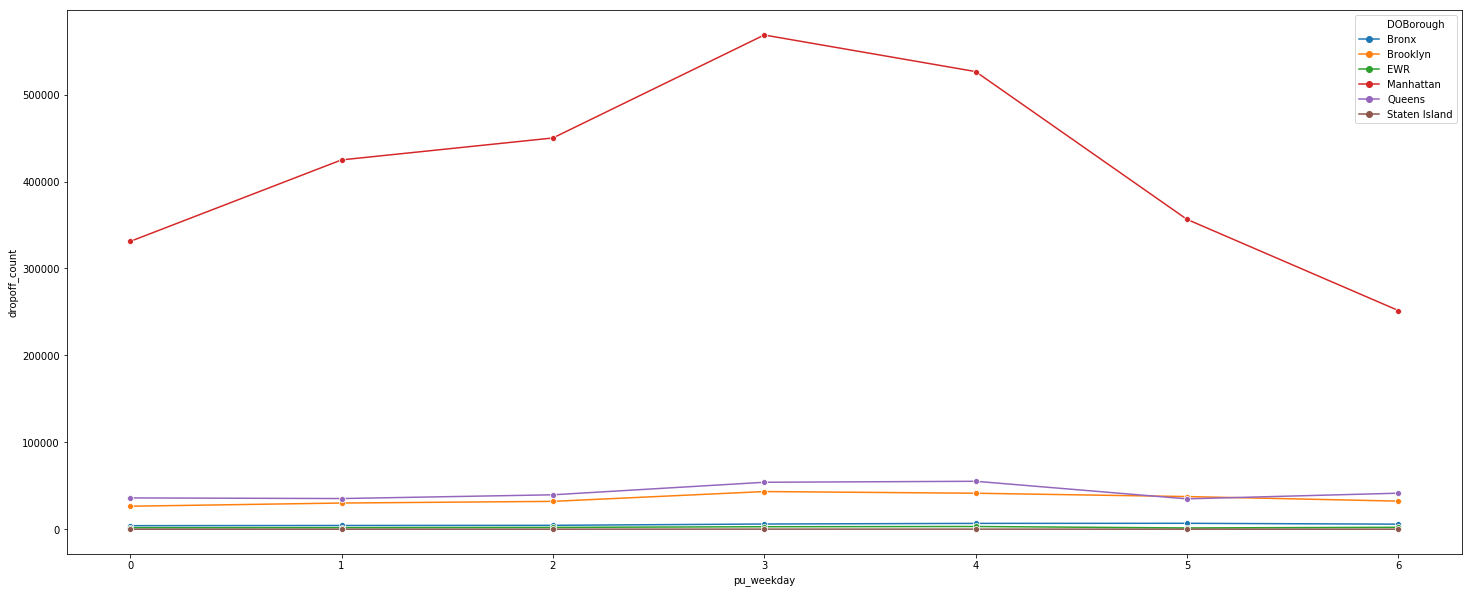

In [45]:
plot_df = manhattan_do.groupby(['pu_weekday', 'DOBorough'])['driver_income_amt'].count().reset_index().rename(columns={'driver_income_amt': 'dropoff_count'})

fig, ax = plt.subplots(figsize=(25, 10))
ax = sns.lineplot(x='pu_weekday', y='dropoff_count', hue='DOBorough', style="DOBorough", data=plot_df, markers=['o'] * len(plot_df['DOBorough'].unique()), dashes=False)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()

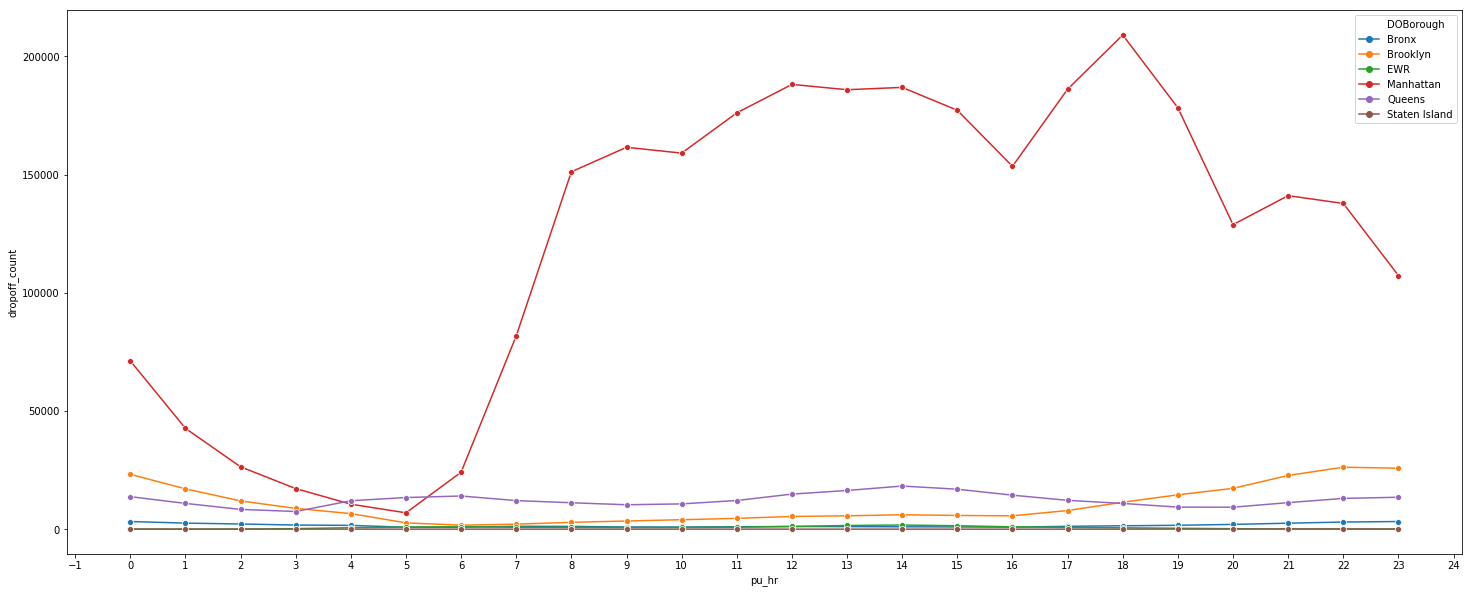

In [46]:
plot_df = manhattan_do.groupby(['pu_hr', 'DOBorough'])['driver_income_amt'].count().reset_index().rename(columns={'driver_income_amt': 'dropoff_count'})

fig, ax = plt.subplots(figsize=(25, 10))
ax = sns.lineplot(x='pu_hr', y='dropoff_count', hue='DOBorough', style="DOBorough", data=plot_df, markers=['o'] * len(plot_df['DOBorough'].unique()), dashes=False)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()

We are further looking at the records with a pickup from Manhattan and pertinent trip duration greater than average of trip duration of all pickups from Manhattan. The historial data tell us for the most of these records, the passengers are picked up from manhattan and dropped off at mahattan mainly on Tuesday, Wednesday,and Thursday with some peak housrs at 9am(morning),12pm(lunch time), 6pm(dinner time) and 9~10pm(night time), or dropped off at Queens mainly on Tuesday, Wednesday, Thursday and Saturday with some peak hours at 2pm(lunch), 9~10pm(night time). On Saturday, there is some trend that passengers picked up from manhattan would like to trip to Queens. Let's look at the Queens' trend.   

In [47]:
Queens_do = drop_data[(drop_data['PUBorough'] == 'Queens')& (drop_data['trip_duration']> 30.724995)]
Queens_do['DOBorough'].unique()

array(['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island', 'EWR'],
      dtype=object)

In [48]:
Queens_doborough = Queens_do.groupby('DOBorough')['driver_income_amt'].count().reset_index().rename(columns={'driver_income_amt': 'dropoff_count'})
Queens_doborough

,DOBorough,dropoff_count
0,Bronx,3897
1,Brooklyn,47005
2,EWR,12
3,Manhattan,228955
4,Queens,17453
5,Staten Island,2


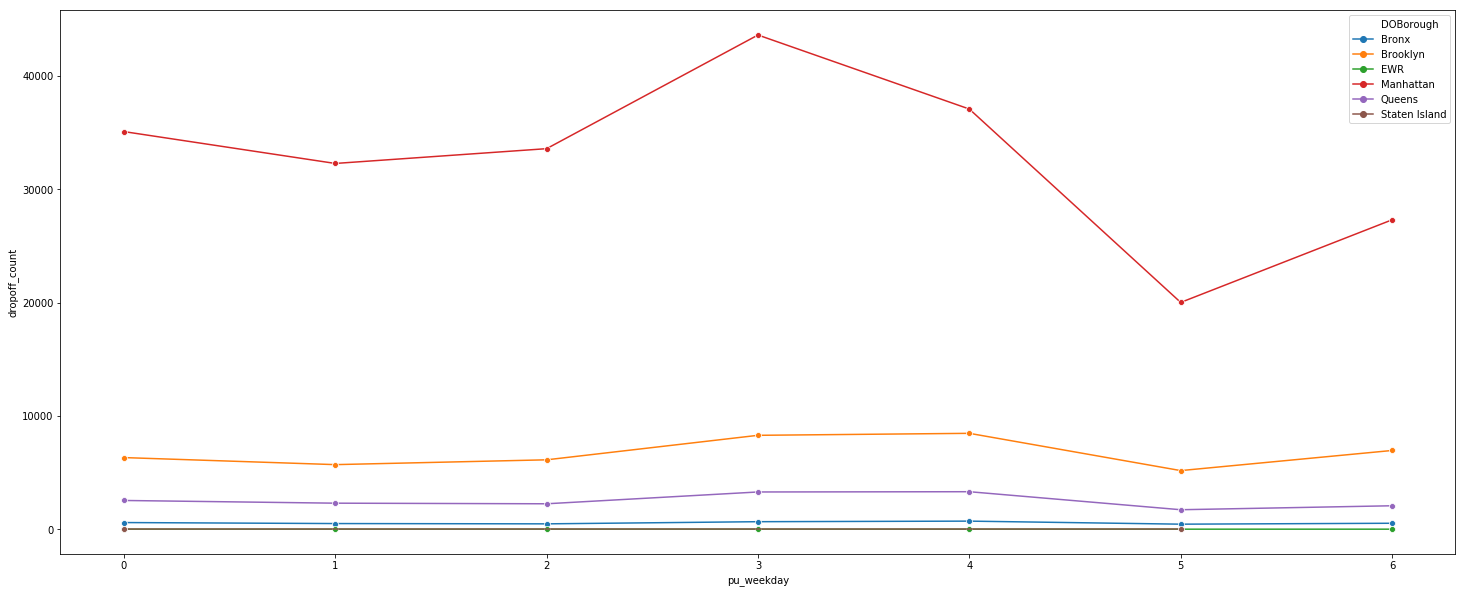

In [49]:
plot_df = Queens_do.groupby(['pu_weekday', 'DOBorough'])['driver_income_amt'].count().reset_index().rename(columns={'driver_income_amt': 'dropoff_count'})

fig, ax = plt.subplots(figsize=(25, 10))
ax = sns.lineplot(x='pu_weekday', y='dropoff_count', hue='DOBorough', style="DOBorough", data=plot_df, markers=['o'] * len(plot_df['DOBorough'].unique()), dashes=False)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()

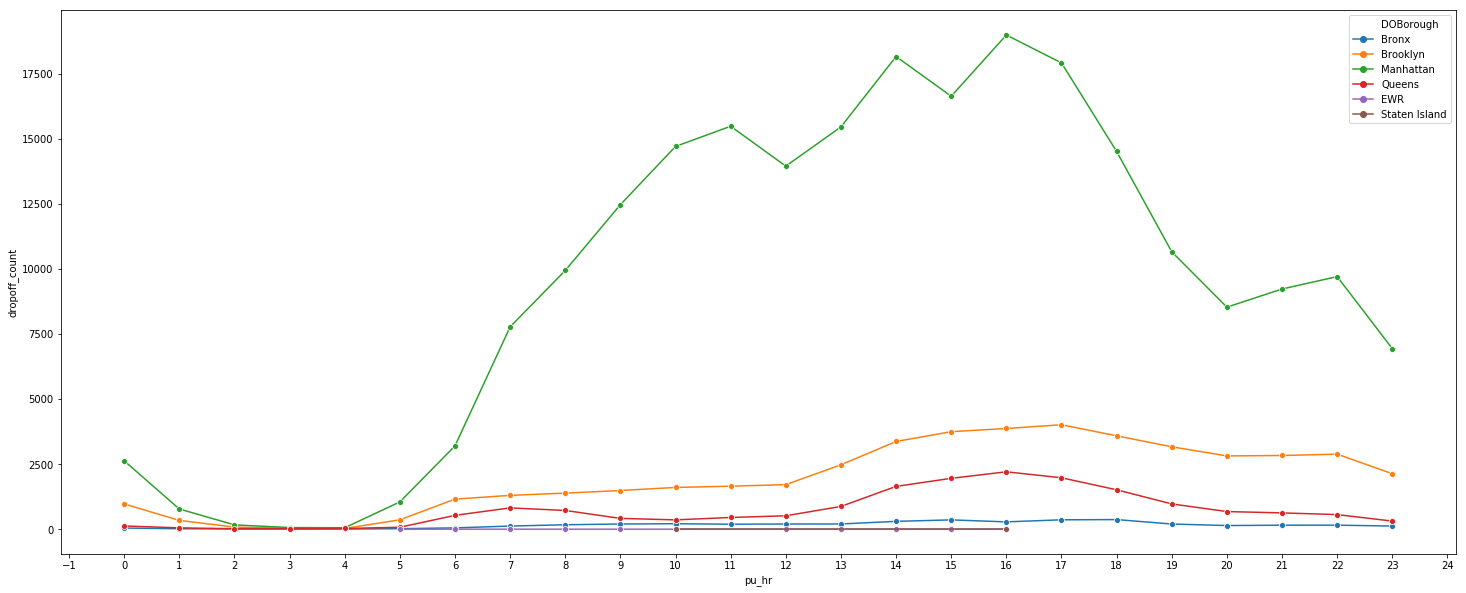

In [50]:
plot_df = Queens_do.groupby(['pu_hr', 'DOBorough'])['driver_income_amt'].count().reset_index().rename(columns={'driver_income_amt': 'dropoff_count'})

fig, ax = plt.subplots(figsize=(25, 10))
ax = sns.lineplot(x='pu_hr', y='dropoff_count', hue='DOBorough', style="DOBorough", data=plot_df, markers=['o'] * len(plot_df['DOBorough'].unique()), dashes=False)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()

These records are with a pickup from Queens and pertinent trip duration greater than average of trip duration of all pickups from Queens. The passengers are picked up from Queens and dropped off at mahattan mainly on Tuesday, Wednesday, Thursday and Saturday with some peak housrs at 11am(morning),2pm(lunch time), 4~5pm(afternoon))and 9~10pm(night time) or dropped off at Queens mainly on Tuesday, Wednesday, Thursday and Saturday with some peak hours at 7am(morning), 4pm(afternoon). On Saturday, there is some trend that passengers picked up from Queens would like to trip to Mahattan. This point is reasonable on weekend specially Saturday, passengers would like to have a short trip betteen Manhattan and Queens as often.

In [51]:
EWR_do = drop_data[(drop_data['PUBorough'] == 'EWR')& (drop_data['trip_duration']> 2)]
EWR_do['DOBorough'].unique()

array(['EWR', 'Brooklyn', 'Manhattan', 'Queens'], dtype=object)

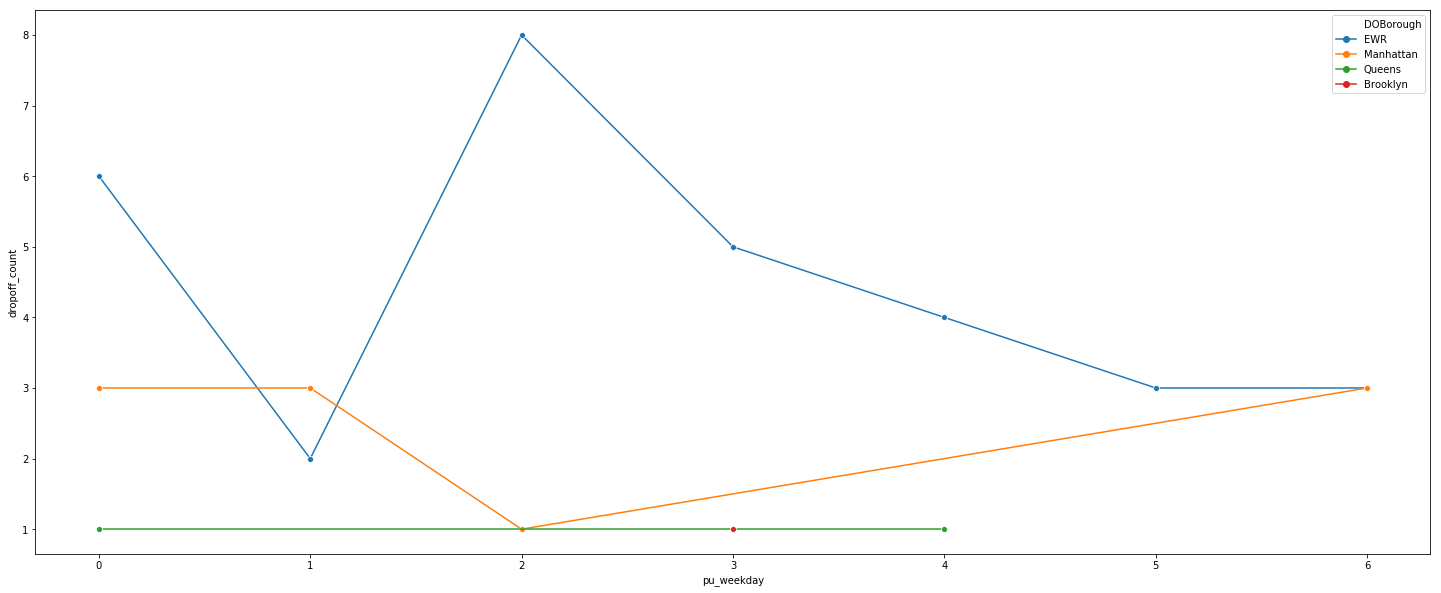

In [52]:
plot_df = EWR_do.groupby(['pu_weekday', 'DOBorough'])['driver_income_amt'].count().reset_index().rename(columns={'driver_income_amt': 'dropoff_count'})

fig, ax = plt.subplots(figsize=(25, 10))
ax = sns.lineplot(x='pu_weekday', y='dropoff_count', hue='DOBorough', style="DOBorough", data=plot_df, markers=['o'] * len(plot_df['DOBorough'].unique()), dashes=False)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()

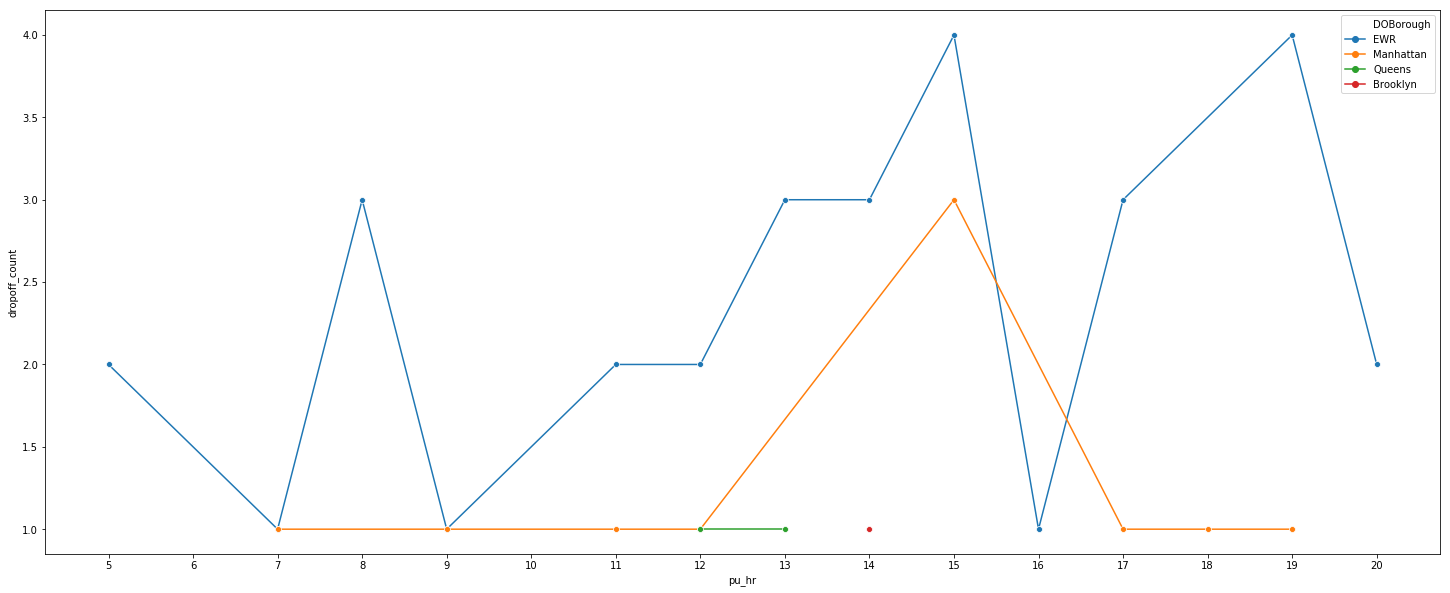

In [53]:
plot_df = EWR_do.groupby(['pu_hr', 'DOBorough'])['driver_income_amt'].count().reset_index().rename(columns={'driver_income_amt': 'dropoff_count'})

fig, ax = plt.subplots(figsize=(25, 10))
ax = sns.lineplot(x='pu_hr', y='dropoff_count', hue='DOBorough', style="DOBorough", data=plot_df, markers=['o'] * len(plot_df['DOBorough'].unique()), dashes=False)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()

# 4. Solution Summary
Given the data provided and above analysis what factors do impact on the total amount the drivers earned, we can get some overall conclusion as below:

To maximize the income, if I were as a driver to work out 10 hours/week plan, I would like to select Mahattan and Queens as my major driving boroughs on weekdays and EWR as an optional borough on weekend. Considering the cost factors such as gas mileage(more passengers, more gas mileage), and time cost(spending a lot of time on waiting or driveing around), and surge pricing into account, one side, I would consider to keep away from the Governor's Island/Ellis Island/Liberty Island zone of Manhattan and zones(Laurelton, Queens Village, Queensboro Hill) of Queens where have the high number of passengers demand, other side, I would consider based on ride demand,hourly rate and trip duration stats analysis to work out the well-defined 10 hours/week driving plan:

Manhattan has the trend that the ride demand gradually increses from Monday through Saturday with a peak on Thursday and trough on Sunday, and there are some hour peaks occuring at 8AM, 12pm, 6pm, and 9pm.

Queens has the trend that the ride demand gradually increases from Monday through Friday with a peak on Thursday and  trough on Saturday and then some gradual increase on Sunday, and there are some hour peaks occuring at 2pm and 4pm. 
EWR mostly use negotiated rate for ride fare and 10am(morning time), 10pm(night time) and 2am(midnight time) as well are the best options for a driver to pick up passengers to get high income.

the passengers are picked up from manhattan and dropped off at mahattan mainly on Tuesday, Wednesday,and Thursday with some peak housrs at 9am(morning),12pm(lunch time), 6pm(dinner time) and 9~10pm(night time), or dropped off at Queens mainly on Tuesday, Wednesday, Thursday and Saturday with some peak hours at 2pm(lunch), 9~10pm(night time). On Saturday, there is some trend that passengers picked up from manhattan would like to trip to Queens.

The passengers are picked up from Queens and dropped off at mahattan mainly on Tuesday, Wednesday, Thursday and Saturday with some peak housrs at 11am(morning),2pm(lunch time), 4~5pm(afternoon))and 9~10pm(night time) or dropped off at Queens mainly on Tuesday, Wednesday, Thursday and Saturday with some peak hours at 7am(morning), 4pm(afternoon). On Saturday, there is some trend that passengers picked up from Queens would like to trip to Mahattan. 

Briefly speaking, 
Better hours of Manhattan are 8am-9am,11:30am ~12:30pm and 9~10pm (Tue,Wen,Thur,Fri)

Better hours of Queens are 1:30pm~2:30pm, 3:30~4:30pm (Tue,Wen,Thur)

Better hours of EWR are 9:30~10:30pm, 1~2am , 10~11am(Sunday)

The well-defined plan will be like this:
1)Driving 2 hours on Tuesday in Manhattan(11:30am ~12:30pm and 9~10pm)

2)Driving 3 hours on Wednesday, 1 hour in Manhattan(11:30am ~12:30pm) and 2 hours in Queens(1:30pm~2:30pm,
3:30~4:30pm)

3)Driving 3 hours on Thursday, 1 hour in Manhattan(11:30am ~12:30pm) and 2 hours in Queens(1:30pm~2:30pm, 3:30~4:30pm)

4)Driving 1 hours on Friday in Queens(3:30~4:30pm) or in Manhattan(8am~9am)

5)Driving 1 hour on Sunday in EWR (9:30~10:30pm)
	

# 5. Suggestions:

To get the optimal solution, we need consider not only income but also cost and have to find a balance between ride density and expenses.Currently we already got the trip and amount data, but we still need to ingest some data shown as below:

1)The cost such as mechanically maintainance, gas mileage, and other expenses related to the trip distance. 

2)Take surge pricing into account

3)Some other factors such as weather impact, etc

4)Time spending on waiting or driving around if possible.

5)If using some apps to help driver to get the ride effectively and efficiently. 